In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import random as random

In [2]:
# Loading the Boston dataset and printing it's shape
X,y = datasets.load_boston(return_X_y = True)

# Considering the first 400 rows as the training data
X_train_temp = X[0:400,:]

# Adding one dimension to the data for theta-0 
X_train = np.zeros((X_train_temp.shape[0],X_train_temp.shape[1] + 1))

# Initializing all theta-0s with 1 
X_train[:,0] = np.ones((X_train_temp.shape[0]))

X_train[:,1:] = X_train_temp

y_train = y[0:400]

# Repeating the same process for the test (validation) data 
X_test_temp = X[400:,:]
X_test = np.zeros((X_test_temp.shape[0],X_test_temp.shape[1] + 1))
X_test[:,0] = np.ones((X_test_temp.shape[0]))

y_test = y[400:]

In [3]:
# Pre-processing the data with some in-built functions
scaler = StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

Theta :  [24.1723397  -0.82645323  0.66878445 -0.16582401  0.62683908 -0.69491047
  3.80683352  0.09475888 -1.85912159  1.54346032 -0.76027761 -1.58292128
  0.1361093  -3.39454744]
Cost-function :  9270.832423782755
MAE :  4.413614536088057
MSE :  28.33196283556925


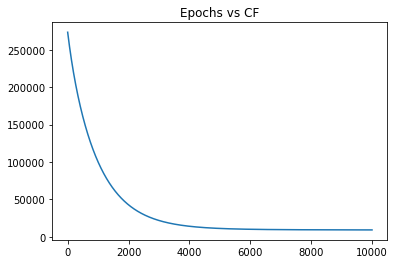

In [14]:
# Initializing theta-0 with random uniform values between 0 and 1
theta = np.random.uniform(0,1,size=(X_train.shape[1]))

# Declaring the epochs (number of iterations) and alpha (learning rate)
epochs = 10000
alpha = 0.0005
var_lambda = 10
# Assigning variables with the number of rows and columns
row = X_train.shape[0]
col = X_train.shape[1]

# Initializing a list which stores error values for every epoch
error_list = []
theta0_list = []
theta1_list = []

# Main algorithm which iterates and updates values of theta (through Gradient Descent)
for i in range(epochs):
    update = np.zeros(X_train.shape[1])
    y_pred = np.dot(X_train,theta)
    error = (y_pred - y_train)
    error_list.append(np.sum(error**2))
    
    for j in range(col):
        update[j] = np.sum(error*(X_train.T)[j])
        
    theta[0] -= (1/row)*(alpha)*(update[0])
    theta[1:] = theta[1:]*(1 - (alpha*var_lambda)/row) - (1/row)*(alpha)*(update[1:])
    theta0_list.append(theta[0])
    theta1_list.append(theta[1])
    
    
    
# Printing the value of thetas    
print("Theta : ",theta)
predictions = np.dot(X_test, theta)
# Printing the Mean Absolute Error and Mean Squared Error
print("MAE : ", metrics.mean_absolute_error(y_true=y_test, y_pred=predictions))
print("MSE : ", metrics.mean_squared_error(y_true=y_test, y_pred=predictions))

# Plotting Epochs vs Error
plt.plot(range(epochs),error_list)
plt.title('Epochs vs CF')
plt.show()

MAE 1: 22.36363729237291
MSE 1 : 528.3896100754638
Cost function 1 : 100598.94297778796

MAE 2: 17.11788739435409
MSE 2 : 321.279405976438
Cost function 2 : 43039.198032955406

MAE 3: 13.022313075829341
MSE 3 : 197.83797497556733
Cost function 3 : 22058.162328890798

MAE 4: 9.709763517411615
MSE 4 : 121.98613763854927
Cost function 4 : 14322.499218876004

MAE 5: 7.268809782407
MSE 5 : 76.24485323084654
Cost function 5 : 11462.466200681663

MAE 6: 5.761809403699198
MSE 6 : 50.15810425310913
Cost function 6 : 10422.017935506494

MAE 7: 4.8607173795922956
MSE 7 : 36.23718990773135
Cost function 7 : 10096.573461045224



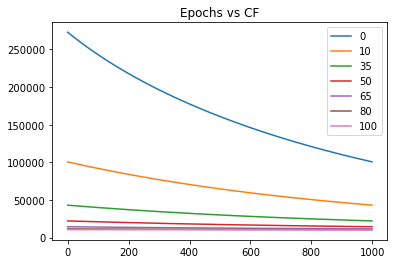

In [67]:
# Initializing theta-0 with random uniform values between 0 and 1
theta = np.random.uniform(0,1,size=(X_train.shape[1]))

# Declaring the epochs (number of iterations) and alpha (learning rate)
epochs = 1000
alpha = 0.0005
var_lambda = [0,10,35,50,65,80,100]
# Assigning variables with the number of rows and columns
row = X_train.shape[0]
col = X_train.shape[1]
count = 1


for var in var_lambda:
    # Initializing a list which stores error values for every epoch
    error_list = []
    theta0_list = []
    theta1_list = []
    
    # Main algorithm which iterates and updates values of theta (through Gradient Descent)
    for i in range(epochs):
        update = np.zeros(X_train.shape[1])
        y_pred = np.dot(X_train,theta)
        error = (y_pred - y_train)
        error_list.append(np.sum(error**2))

        for j in range(col):
            update[j] = np.sum(error*(X_train.T)[j])

        theta[0] -= (1/row)*(alpha)*(update[0])
        theta[1:] = theta[1:]*(1 - (alpha*var)/row) - (1/row)*(alpha)*(update[1:])
        theta0_list.append(theta[0])
        theta1_list.append(theta[1])
        
    predictions = np.dot(X_test, theta)
    # Plotting Epochs vs Error
    plt.plot(range(epochs),error_list)
    plt.title('Epochs vs CF')
    print("MAE {}: {}".format(count, metrics.mean_absolute_error(y_true = y_test, y_pred = predictions)))
    print("MSE {} : {}".format(count, metrics.mean_squared_error(y_true=y_test, y_pred=predictions)))
    print("Cost function {} : {}\n".format(count, error_list[-1]))
    count += 1


plt.legend([0, 10, 35, 50, 65, 80, 100])
plt.show()

In [66]:
# Linear Regression through Normalisation Equation

from numpy.linalg import inv, LinAlgError

reg_mat = np.zeros((X_train.shape[1],X_train.shape[1]))
var_lam = [0,10,35,50,65,80,100]
count = 1
for var in var_lam:
    for i in range(1,X_train.shape[1]):
        reg_mat[i][i] = var

    theta = np.zeros(X_train.shape[1])

    # var1 is the term : (X-transpose * X)^(-1)
    var1 = inv(np.dot(X_train.T,X_train) + reg_mat)

    # var2 is the term: (X-transpose * Y) 
    var2 = np.dot(X_train.T,y_train)

    theta = np.dot(var1, var2)

    #print("Thetas: ",theta)

    predictions = np.dot(theta, X_test.T)

    # Printing the Mean Absolute Error and Mean Squared Error
    print("MAE {}: {}".format(count, metrics.mean_absolute_error(y_true = y_test, y_pred = predictions)))
    print("MSE {}: {}\n".format(count, metrics.mean_squared_error(y_true = y_test, y_pred = predictions)))
    count += 1

MAE 1: 12.95990903253822
MSE 1: 195.66567300266362

MAE 2: 9.978609757052448
MSE 2: 124.63797457703069

MAE 3: 6.295567035801667
MSE 3: 58.361376879148544

MAE 4: 5.455488947979064
MSE 4: 44.9337329645806

MAE 5: 5.069558587425153
MSE 5: 38.17118854861344

MAE 6: 4.858672364211855
MSE 6: 34.59081372983539

MAE 7: 4.702253243990207
MSE 7: 32.18451455183305

